In [15]:
#import libraries
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna
from ta.momentum import AwesomeOscillatorIndicator
from ta.momentum import AwesomeOscillatorIndicator
from ta.momentum import KAMAIndicator
from ta.momentum import PercentagePriceOscillator
from ta.momentum import ROCIndicator
from ta.momentum import RSIIndicator
from ta.momentum import UltimateOscillator
from ta.volume import ForceIndexIndicator
from ta.volume import AccDistIndexIndicator
from ta.volume import ChaikinMoneyFlowIndicator
from ta.volume import EaseOfMovementIndicator
from ta.volume import MFIIndicator
from ta.volume import VolumePriceTrendIndicator
from ta.volatility import BollingerBands
from ta.volatility import DonchianChannel
from ta.volatility import UlcerIndex
from ta.volatility import KeltnerChannel
from ta.trend import ADXIndicator
from ta.trend import AroonIndicator
from ta.trend import EMAIndicator
from ta.trend import MACD
from ta.trend import MassIndex
import os
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
os.chdir('D:\\')

In [7]:
#plain dataframe read
df = pd.read_csv('prc.csv')

In [8]:
#checking the dataframe for the column names I will need
df.tail(10)

,date,gvkey,open,high,low,close,volume
10634177,2021-02-17,340153,32.59,33.56,32.50,33.10,1542328
10634178,2021-02-18,340153,33.00,33.63,32.47,32.51,1626428
10634179,2021-02-19,340153,32.50,32.97,31.93,32.32,1397121
10634180,2021-02-22,340153,32.20,32.20,31.43,31.43,1179210
10634181,2021-02-23,340153,31.53,32.00,29.52,30.32,2358958
10634182,2021-02-24,340153,30.50,31.71,30.18,30.39,2018977
10634183,2021-02-25,340153,30.90,31.28,30.47,30.48,1461881
10634184,2021-02-26,340153,30.08,31.33,29.67,31.25,1850125
10634185,2021-03-01,340153,31.82,32.28,31.50,31.59,1508344
10634186,2021-03-02,340153,31.48,31.78,30.66,30.66,1556788


In [9]:
def fit_indicators(df_a):
    AwesomeOscillator = AwesomeOscillatorIndicator(high=df_a["high"],low=df_a["low"],window1 = 5,window2 =34)
    KAMA = KAMAIndicator(close = df_a["close"],window = 10,pow1 = 2, pow2 = 30)
    PPO = PercentagePriceOscillator(close = df_a["close"],window_slow = 26, window_fast = 12, window_sign = 9)
    ROCI = ROCIndicator(close=df_a["close"],window=12)
    RSI = RSIIndicator(close=df_a["close"],window = 14)
    UO = UltimateOscillator(high = df_a["high"] , low = df_a["low"],close = df_a["close"],window1=7,window2=14,window3=28,weight1=4.0,weight2=2.0,weight3=1.0)
    ADI = AccDistIndexIndicator(high = df_a["high"], low = df_a["low"], close= df_a["close"], volume = df_a["volume"])
    Chaikin = ChaikinMoneyFlowIndicator(high = df_a["high"], low = df_a["low"], close= df_a["close"],volume=df_a["volume"],window = 20)   
    EOM = EaseOfMovementIndicator(high = df_a["high"], low = df_a["low"],volume=df_a["volume"],window = 14)
    FII = ForceIndexIndicator(close = df_a["close"],volume = df_a["volume"], window = 13)
    MFI = MFIIndicator(high = df_a["high"], low = df_a["low"],close = df_a["close"],volume = df_a["volume"],window = 14)
    VPT = VolumePriceTrendIndicator(close = df_a["close"],volume = df_a["volume"])
    BB = BollingerBands(close = df_a["close"],window = 20, window_dev = 2)
    Ulcer = UlcerIndex(close = df_a["close"], window = 14)
    EMA14 = EMAIndicator(close = df_a["close"],window = 14)
    EMA25 = EMAIndicator(close = df_a["close"],window = 25)
    EMA40 = EMAIndicator(close = df_a["close"],window = 40)
    EMA50 = EMAIndicator(close = df_a["close"],window = 50)
    EMA100 = EMAIndicator(close = df_a["close"],window = 100)
    MACD_ind = MACD(close = df_a["close"],window_slow = 26,window_fast = 12,window_sign=9)
    Mass = MassIndex(high = df_a["high"],low = df_a["low"], window_fast = 9,window_slow = 25)
    Aroon = AroonIndicator(close = df_a["close"],window = 25)

    df_a = df_a.assign(AwesomeOscillator = AwesomeOscillator.awesome_oscillator(),KAMA = KAMA.kama(),PPO = PPO.ppo_signal(),
                      ROCI = ROCI.roc(),RSI = RSI.rsi(),UO = UO.ultimate_oscillator(), ADI = ADI.acc_dist_index(),
                      Chaikin = Chaikin.chaikin_money_flow(), EOM = EOM.ease_of_movement(),EOMS = EOM.sma_ease_of_movement(),
                      FII = FII.force_index(), MFI = MFI.money_flow_index(), VPT = VPT.volume_price_trend(),
                      BBHigh = BB.bollinger_hband(),BBLow=BB.bollinger_lband(),BBHighInd=BB.bollinger_hband_indicator(),
                      BBLowInd= BB.bollinger_lband_indicator(),Ulcer = Ulcer.ulcer_index(), AroonDown = Aroon.aroon_down(),
                      AroonUp = Aroon.aroon_up(),AroonInd = Aroon.aroon_indicator(),Mass=Mass.mass_index(),MACD = MACD_ind.macd_signal(),
                      EMA14 = EMA14.ema_indicator(),
                      EMA25 = EMA25.ema_indicator(),
                      EMA40 = EMA40.ema_indicator(),
                      EMA50 = EMA50.ema_indicator(),
                      EMA100 = EMA100.ema_indicator())
    return df_a

In [10]:
df1 = df.groupby('gvkey').apply(fit_indicators)

In [13]:
df2 = df1.reset_index(drop= True)

In [14]:
df2

,date,gvkey,open,high,low,close,volume,AwesomeOscillator,KAMA,PPO,...,AroonDown,AroonUp,AroonInd,Mass,MACD,EMA14,EMA25,EMA40,EMA50,EMA100
0,1999-01-04,1166,NaN,4.60,4.45,4.50,45145,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-05,1166,NaN,4.60,4.45,4.50,32047,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-01-06,1166,NaN,5.00,4.60,4.70,550752,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-01-07,1166,NaN,4.90,4.60,4.85,323750,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-01-08,1166,NaN,5.60,5.05,5.15,651759,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10634182,2021-02-24,340153,30.50,31.71,30.18,30.39,2018977,-0.106294,32.192029,1.360729,...,96.0,80.0,-16.0,24.182290,0.424783,31.523663,31.364217,30.689729,30.140426,27.766735
10634183,2021-02-25,340153,30.90,31.28,30.47,30.48,1461881,-0.471882,32.101334,1.137606,...,92.0,76.0,-16.0,24.325517,0.355155,31.384508,31.296200,30.679499,30.153743,27.820463
10634184,2021-02-26,340153,30.08,31.33,29.67,31.25,1850125,-0.788353,32.097032,0.950636,...,88.0,72.0,-16.0,24.462259,0.296803,31.366574,31.292646,30.707328,30.196733,27.888374
10634185,2021-03-01,340153,31.82,32.28,31.50,31.59,1508344,-0.730265,32.094051,0.811270,...,84.0,68.0,-16.0,24.457427,0.253326,31.396364,31.315520,30.750385,30.251371,27.961674


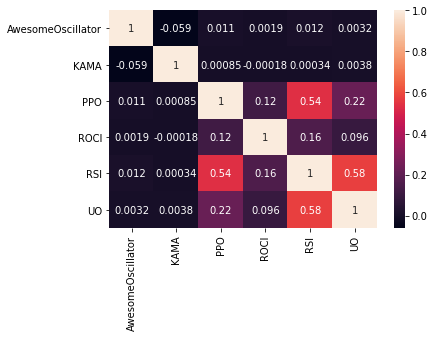

In [16]:
# Correlation in Momentum
df_mom = df2[['AwesomeOscillator','KAMA','PPO','ROCI','RSI','UO']]
corrMatrix = df_mom.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

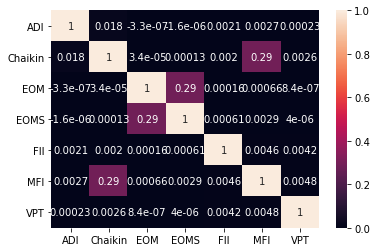

In [17]:
# Correlation in Volume
df_volume = df2[['ADI','Chaikin','EOM','EOMS','FII','MFI','VPT']]
corrMatrix = df_volume.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

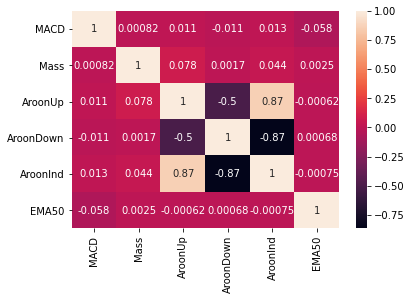

In [19]:
# Correlation in Trend
df_trend = df2[['MACD','Mass','AroonUp','AroonDown','AroonInd','EMA50']]
corrMatrix = df_trend.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

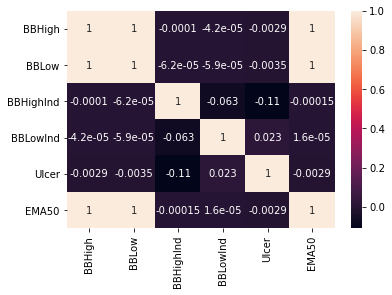

In [20]:
# Correlation in Volatility
df_volatility = df2[['BBHigh','BBLow','BBHighInd','BBLowInd','Ulcer','EMA50']]
corrMatrix = df_volatility.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()